**Biomarker Prediction**

In [115]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("/content/drive/MyDrive/combined_species.csv")

In [117]:
df.head()

,Sample,Tepidimonas_arfidensis,Anaerostipes_caccae,Aeribacillus_pallidus,Clostridium_oroticum,Polyangium_brachysporum,Clostridium_sporosphaeroides,Corynebacterium_glucuronolyticum,Atopobium_parvulum,Desulfotomaculum_intricatum,...,Salinicoccus_roseus,Citrobacter_amalonaticus,Trigonala_elaeagnus,Microaerobacter_geothermalis,Bacillus_barbaricus,Moraxella_lincolnii,Acinetobacter_parvus,Psychrobacter_sanguinis,Massilia_timonae,Neisseria_sicca
0,ERR3928931,0,0,0,0,0,94,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,ERR3928933,0,0,0,0,0,79,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,ERR3928935,0,0,0,0,0,108,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,ERR3928937,0,1,0,1,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ERR3928938,0,0,0,0,0,152,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
df.isnull().sum()

Sample                     0
Tepidimonas_arfidensis     0
Anaerostipes_caccae        0
Aeribacillus_pallidus      0
Clostridium_oroticum       0
                          ..
Moraxella_lincolnii        0
Acinetobacter_parvus       0
Psychrobacter_sanguinis    0
Massilia_timonae           0
Neisseria_sicca            0
Length: 2704, dtype: int64

In [119]:
metadata = pd.read_excel("/content/drive/MyDrive/metadata_species.xlsx")

In [120]:
metadata.head()

,Sample,Sample_type,Age,Sex,Country
0,ERR3928931,CRC,81,female,Vietnam
1,ERR3928933,CRC,89,female,Vietnam
2,ERR3928935,CRC,65,male,Vietnam
3,ERR3928937,CRC,84,male,Vietnam
4,ERR3928938,CRC,81,female,Vietnam


In [121]:
df = pd.merge(df, metadata, on='Sample', how='inner')

In [122]:
df.head()

,Sample,Tepidimonas_arfidensis,Anaerostipes_caccae,Aeribacillus_pallidus,Clostridium_oroticum,Polyangium_brachysporum,Clostridium_sporosphaeroides,Corynebacterium_glucuronolyticum,Atopobium_parvulum,Desulfotomaculum_intricatum,...,Bacillus_barbaricus,Moraxella_lincolnii,Acinetobacter_parvus,Psychrobacter_sanguinis,Massilia_timonae,Neisseria_sicca,Sample_type,Age,Sex,Country
0,ERR3928931,0,0,0,0,0,94,0,5,0,...,0,0,0,0,0,0,CRC,81,female,Vietnam
1,ERR3928933,0,0,0,0,0,79,0,1,0,...,0,0,0,0,0,0,CRC,89,female,Vietnam
2,ERR3928935,0,0,0,0,0,108,0,2,0,...,0,0,0,0,0,0,CRC,65,male,Vietnam
3,ERR3928937,0,1,0,1,0,10,0,1,0,...,0,0,0,0,0,0,CRC,84,male,Vietnam
4,ERR3928938,0,0,0,0,0,152,0,0,0,...,0,0,0,0,0,0,CRC,81,female,Vietnam


In [123]:
# df.set_index('Sample', inplace=True)
# metadata.set_index('Sample', inplace=True)

In [124]:
# Check if indices (row names) are the same
# same_indices = df.index.equals(metadata.index)
# print(f"Both files have the same row names: {same_indices}")

In [125]:
# # Find common and different indices
# common_indices = df.index.intersection(metadata.index)
# different_indices_df = df.index.difference(metadata.index)
# different_indices_metatdata = metadata.index.difference(df.index)

# print(f"Common row names: {common_indices}")
# print(f"Row names in file1 not in file2: {different_indices_df}")
# print(f"Row names in file2 not in file1: {different_indices_metatdata}")


In [126]:
df.isnull().sum()

Sample                    0
Tepidimonas_arfidensis    0
Anaerostipes_caccae       0
Aeribacillus_pallidus     0
Clostridium_oroticum      0
                         ..
Neisseria_sicca           0
Sample_type               0
Age                       0
Sex                       0
Country                   0
Length: 2708, dtype: int64

In [127]:
from sklearn.preprocessing import OneHotEncoder

In [128]:
# Create the OneHotEncoder instance
encoder = OneHotEncoder()
# Fit and transform the 'country' column
encoded = encoder.fit_transform(df[['Country']])

# The output is an array so we need to convert it into a DataFrame
encoded_df= pd.DataFrame(encoded.toarray(), columns = encoder.get_feature_names_out())
# Concatenate the original DataFrame with the new encoded DataFrame
encoder.get_feature_names_out()

array(['Country_India', 'Country_Spain', 'Country_Taiwan', 'Country_USA',
       'Country_Vietnam'], dtype=object)

In [129]:
encoded_df

,Country_India,Country_Spain,Country_Taiwan,Country_USA,Country_Vietnam
0,0.00,0.00,0.00,0.00,1.00
1,0.00,0.00,0.00,0.00,1.00
2,0.00,0.00,0.00,0.00,1.00
3,0.00,0.00,0.00,0.00,1.00
4,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...
296,0.00,0.00,1.00,0.00,0.00
297,0.00,0.00,1.00,0.00,0.00
298,0.00,0.00,1.00,0.00,0.00
299,0.00,0.00,1.00,0.00,0.00


In [130]:
df = pd.concat([df, encoded_df], axis = 1)

In [131]:
df

,Sample,Tepidimonas_arfidensis,Anaerostipes_caccae,Aeribacillus_pallidus,Clostridium_oroticum,Polyangium_brachysporum,Clostridium_sporosphaeroides,Corynebacterium_glucuronolyticum,Atopobium_parvulum,Desulfotomaculum_intricatum,...,Neisseria_sicca,Sample_type,Age,Sex,Country,Country_India,Country_Spain,Country_Taiwan,Country_USA,Country_Vietnam
0,ERR3928931,0,0,0,0,0,94,0,5,0,...,0,CRC,81,female,Vietnam,0.00,0.00,0.00,0.00,1.00
1,ERR3928933,0,0,0,0,0,79,0,1,0,...,0,CRC,89,female,Vietnam,0.00,0.00,0.00,0.00,1.00
2,ERR3928935,0,0,0,0,0,108,0,2,0,...,0,CRC,65,male,Vietnam,0.00,0.00,0.00,0.00,1.00
3,ERR3928937,0,1,0,1,0,10,0,1,0,...,0,CRC,84,male,Vietnam,0.00,0.00,0.00,0.00,1.00
4,ERR3928938,0,0,0,0,0,152,0,0,0,...,0,CRC,81,female,Vietnam,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,SRR9179366,0,0,0,0,0,3,0,4,0,...,0,CRC,63,male,Taiwan,0.00,0.00,1.00,0.00,0.00
297,SRR9179367,0,0,0,0,0,0,0,0,0,...,0,CRC,88,female,Taiwan,0.00,0.00,1.00,0.00,0.00
298,SRR9179368,0,10,0,0,0,2,0,0,0,...,0,CRC,73,male,Taiwan,0.00,0.00,1.00,0.00,0.00
299,SRR9179369,0,0,0,2,0,0,0,2,0,...,0,CRC,40,male,Taiwan,0.00,0.00,1.00,0.00,0.00


In [132]:
df = df.drop(columns=['Country'])

In [133]:
df

,Sample,Tepidimonas_arfidensis,Anaerostipes_caccae,Aeribacillus_pallidus,Clostridium_oroticum,Polyangium_brachysporum,Clostridium_sporosphaeroides,Corynebacterium_glucuronolyticum,Atopobium_parvulum,Desulfotomaculum_intricatum,...,Massilia_timonae,Neisseria_sicca,Sample_type,Age,Sex,Country_India,Country_Spain,Country_Taiwan,Country_USA,Country_Vietnam
0,ERR3928931,0,0,0,0,0,94,0,5,0,...,0,0,CRC,81,female,0.00,0.00,0.00,0.00,1.00
1,ERR3928933,0,0,0,0,0,79,0,1,0,...,0,0,CRC,89,female,0.00,0.00,0.00,0.00,1.00
2,ERR3928935,0,0,0,0,0,108,0,2,0,...,0,0,CRC,65,male,0.00,0.00,0.00,0.00,1.00
3,ERR3928937,0,1,0,1,0,10,0,1,0,...,0,0,CRC,84,male,0.00,0.00,0.00,0.00,1.00
4,ERR3928938,0,0,0,0,0,152,0,0,0,...,0,0,CRC,81,female,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,SRR9179366,0,0,0,0,0,3,0,4,0,...,0,0,CRC,63,male,0.00,0.00,1.00,0.00,0.00
297,SRR9179367,0,0,0,0,0,0,0,0,0,...,0,0,CRC,88,female,0.00,0.00,1.00,0.00,0.00
298,SRR9179368,0,10,0,0,0,2,0,0,0,...,0,0,CRC,73,male,0.00,0.00,1.00,0.00,0.00
299,SRR9179369,0,0,0,2,0,0,0,2,0,...,0,0,CRC,40,male,0.00,0.00,1.00,0.00,0.00


In [134]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [135]:
df['Sample_type'] = encoder.fit_transform(df['Sample_type'])

In [136]:
df['Sex'] = encoder.fit_transform(df['Sex'])

In [137]:
df.Sample_type.unique()

array([0, 1])

In [138]:
df['Sample_type'].value_counts()

Sample_type
0    159
1    142
Name: count, dtype: int64

In [139]:
df['Sex'].value_counts()  ## 0= Female, 1 = Male

Sex
1    166
0    135
Name: count, dtype: int64

In [140]:
df.head()

,Sample,Tepidimonas_arfidensis,Anaerostipes_caccae,Aeribacillus_pallidus,Clostridium_oroticum,Polyangium_brachysporum,Clostridium_sporosphaeroides,Corynebacterium_glucuronolyticum,Atopobium_parvulum,Desulfotomaculum_intricatum,...,Massilia_timonae,Neisseria_sicca,Sample_type,Age,Sex,Country_India,Country_Spain,Country_Taiwan,Country_USA,Country_Vietnam
0,ERR3928931,0,0,0,0,0,94,0,5,0,...,0,0,0,81,0,0.00,0.00,0.00,0.00,1.00
1,ERR3928933,0,0,0,0,0,79,0,1,0,...,0,0,0,89,0,0.00,0.00,0.00,0.00,1.00
2,ERR3928935,0,0,0,0,0,108,0,2,0,...,0,0,0,65,1,0.00,0.00,0.00,0.00,1.00
3,ERR3928937,0,1,0,1,0,10,0,1,0,...,0,0,0,84,1,0.00,0.00,0.00,0.00,1.00
4,ERR3928938,0,0,0,0,0,152,0,0,0,...,0,0,0,81,0,0.00,0.00,0.00,0.00,1.00


In [141]:
df = df.drop(['Sample'], axis = 1)

In [142]:
df

,Tepidimonas_arfidensis,Anaerostipes_caccae,Aeribacillus_pallidus,Clostridium_oroticum,Polyangium_brachysporum,Clostridium_sporosphaeroides,Corynebacterium_glucuronolyticum,Atopobium_parvulum,Desulfotomaculum_intricatum,Enterobacter_asburiae,...,Massilia_timonae,Neisseria_sicca,Sample_type,Age,Sex,Country_India,Country_Spain,Country_Taiwan,Country_USA,Country_Vietnam
0,0,0,0,0,0,94,0,5,0,0,...,0,0,0,81,0,0.00,0.00,0.00,0.00,1.00
1,0,0,0,0,0,79,0,1,0,0,...,0,0,0,89,0,0.00,0.00,0.00,0.00,1.00
2,0,0,0,0,0,108,0,2,0,0,...,0,0,0,65,1,0.00,0.00,0.00,0.00,1.00
3,0,1,0,1,0,10,0,1,0,0,...,0,0,0,84,1,0.00,0.00,0.00,0.00,1.00
4,0,0,0,0,0,152,0,0,0,0,...,0,0,0,81,0,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,3,0,4,0,0,...,0,0,0,63,1,0.00,0.00,1.00,0.00,0.00
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,88,0,0.00,0.00,1.00,0.00,0.00
298,0,10,0,0,0,2,0,0,0,0,...,0,0,0,73,1,0.00,0.00,1.00,0.00,0.00
299,0,0,0,2,0,0,0,2,0,0,...,0,0,0,40,1,0.00,0.00,1.00,0.00,0.00


In [143]:
X = df.drop(columns = ['Sample_type'])  # All columns except the last one as features
y = df['Sample_type']  # sample_type column as the target

In [144]:
X

,Tepidimonas_arfidensis,Anaerostipes_caccae,Aeribacillus_pallidus,Clostridium_oroticum,Polyangium_brachysporum,Clostridium_sporosphaeroides,Corynebacterium_glucuronolyticum,Atopobium_parvulum,Desulfotomaculum_intricatum,Enterobacter_asburiae,...,Psychrobacter_sanguinis,Massilia_timonae,Neisseria_sicca,Age,Sex,Country_India,Country_Spain,Country_Taiwan,Country_USA,Country_Vietnam
0,0,0,0,0,0,94,0,5,0,0,...,0,0,0,81,0,0.00,0.00,0.00,0.00,1.00
1,0,0,0,0,0,79,0,1,0,0,...,0,0,0,89,0,0.00,0.00,0.00,0.00,1.00
2,0,0,0,0,0,108,0,2,0,0,...,0,0,0,65,1,0.00,0.00,0.00,0.00,1.00
3,0,1,0,1,0,10,0,1,0,0,...,0,0,0,84,1,0.00,0.00,0.00,0.00,1.00
4,0,0,0,0,0,152,0,0,0,0,...,0,0,0,81,0,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,3,0,4,0,0,...,0,0,0,63,1,0.00,0.00,1.00,0.00,0.00
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,88,0,0.00,0.00,1.00,0.00,0.00
298,0,10,0,0,0,2,0,0,0,0,...,0,0,0,73,1,0.00,0.00,1.00,0.00,0.00
299,0,0,0,2,0,0,0,2,0,0,...,0,0,0,40,1,0.00,0.00,1.00,0.00,0.00


In [145]:
y

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Sample_type, Length: 301, dtype: int64

In [146]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [147]:
X_train

,Tepidimonas_arfidensis,Anaerostipes_caccae,Aeribacillus_pallidus,Clostridium_oroticum,Polyangium_brachysporum,Clostridium_sporosphaeroides,Corynebacterium_glucuronolyticum,Atopobium_parvulum,Desulfotomaculum_intricatum,Enterobacter_asburiae,...,Psychrobacter_sanguinis,Massilia_timonae,Neisseria_sicca,Age,Sex,Country_India,Country_Spain,Country_Taiwan,Country_USA,Country_Vietnam
184,0,0,0,0,0,4,80,0,0,0,...,0,0,0,94,0,0.00,1.00,0.00,0.00,0.00
132,0,0,0,0,0,9,0,2,0,0,...,0,0,0,44,0,1.00,0.00,0.00,0.00,0.00
194,0,0,0,9,0,2,0,0,0,1,...,0,0,0,92,0,0.00,1.00,0.00,0.00,0.00
75,0,0,0,0,0,9,0,0,0,0,...,0,0,0,59,0,0.00,0.00,0.00,0.00,1.00
111,0,0,0,0,0,10,0,4,0,0,...,0,0,0,75,1,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0,0,0,0,0,5,28,0,0,0,...,0,0,0,56,1,0.00,1.00,0.00,0.00,0.00
71,0,0,0,2,0,20,0,1,0,0,...,0,0,0,71,1,0.00,0.00,0.00,0.00,1.00
106,0,0,0,0,0,116,0,0,0,0,...,0,0,0,31,0,1.00,0.00,0.00,0.00,0.00
270,0,0,0,61,0,61,0,3,0,0,...,0,0,0,81,0,0.00,0.00,0.00,1.00,0.00


In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_scaled = sc.fit_transform(X_train)
test_scaled = sc.transform(X_test)

In [149]:
train_scaled

array([[-0.070447  , -0.14740366, -0.06533094, ..., -0.24889135,
        -0.27610357, -0.60302269],
       [-0.070447  , -0.14740366, -0.06533094, ..., -0.24889135,
        -0.27610357, -0.60302269],
       [-0.070447  , -0.14740366, -0.06533094, ..., -0.24889135,
        -0.27610357, -0.60302269],
       ...,
       [-0.070447  , -0.14740366, -0.06533094, ..., -0.24889135,
        -0.27610357, -0.60302269],
       [-0.070447  , -0.14740366, -0.06533094, ..., -0.24889135,
         3.62182924, -0.60302269],
       [-0.070447  , -0.14740366, -0.06533094, ..., -0.24889135,
        -0.27610357, -0.60302269]])

In [150]:
test_scaled

array([[-0.070447  , -0.14740366, -0.06533094, ..., -0.24889135,
        -0.27610357, -0.60302269],
       [-0.070447  ,  0.01713996, -0.06533094, ...,  4.01781746,
        -0.27610357, -0.60302269],
       [-0.070447  , -0.14740366, -0.06533094, ..., -0.24889135,
        -0.27610357, -0.60302269],
       ...,
       [-0.070447  , -0.14740366, -0.06533094, ..., -0.24889135,
         3.62182924, -0.60302269],
       [-0.070447  , -0.14740366, -0.06533094, ...,  4.01781746,
        -0.27610357, -0.60302269],
       [-0.070447  , -0.14740366, -0.06533094, ..., -0.24889135,
        -0.27610357, -0.60302269]])

In [151]:
pip install lazypredict

In [152]:
# Importing LazyRegressor
from lazypredict.Supervised import LazyClassifier

In [153]:
# Fit all models
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 21%|██        | 6/29 [00:02<00:07,  2.90it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 90%|████████▉ | 26/29 [00:09<00:01,  2.49it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:13<00:01,  1.15s/it]

[LightGBM] [Info] Number of positive: 115, number of negative: 125
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14024
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 584
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479167 -> initscore=-0.083382
[LightGBM] [Info] Start training from score -0.083382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

100%|██████████| 29/29 [00:14<00:00,  2.01it/s]


In [154]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.67               0.68     0.68      0.67   
AdaBoostClassifier                 0.66               0.66     0.66      0.66   
BaggingClassifier                  0.64               0.63     0.63      0.64   
ExtraTreeClassifier                0.62               0.62     0.62      0.62   
XGBClassifier                      0.61               0.62     0.62      0.61   
ExtraTreesClassifier               0.62               0.62     0.62      0.62   
NuSVC                              0.62               0.60     0.60      0.61   
LogisticRegression                 0.59               0.58     0.58      0.59   
RidgeClassifierCV                  0.57               0.57     0.57      0.57   
DecisionTreeClassifier             0.56               0.56     0.56      0.56   
RandomForestClassifier      

In [155]:
from sklearn.feature_selection import SelectKBest, f_classif
# Feature selection using ANOVA F-test
k = 130  # Number of features to select
skb = SelectKBest(score_func=f_classif, k=k)
train_scaled_selected = skb.fit_transform(train_scaled, y_train)
test_scaled_selected = skb.transform(test_scaled)

# Get the names of the selected features
selected_features = X_train.columns[skb.get_support(indices=True)]

print("Selected top 50 features names: ", selected_features)


Selected top 50 features names:  Index(['Methanosphaera_stadtmanae', 'Clostridium_isatidis',
       'Aquabacterium_parvum', 'Cryptobacterium_curtum', 'Filifactor_villosus',
       'Granulicatella_elegans', 'Anaerococcus_hydrogenalis',
       'Olsenella_umbonata', 'Clostridium_putrefaciens',
       'Clostridium_hathewayi',
       ...
       'Microbacterium_lacus', 'Johnsonella_ignava', 'Neisseria_pharyngis',
       'Leifsonia_xyli', 'Delftia_acidovorans', 'Prevotella_scopos',
       'Desulfovibrio_litoralis', 'Sphingomonas_mali', 'Age',
       'Country_Taiwan'],
      dtype='object', length=130)


In [156]:
X=X[selected_features]

In [157]:
X

,Methanosphaera_stadtmanae,Clostridium_isatidis,Aquabacterium_parvum,Cryptobacterium_curtum,Filifactor_villosus,Granulicatella_elegans,Anaerococcus_hydrogenalis,Olsenella_umbonata,Clostridium_putrefaciens,Clostridium_hathewayi,...,Microbacterium_lacus,Johnsonella_ignava,Neisseria_pharyngis,Leifsonia_xyli,Delftia_acidovorans,Prevotella_scopos,Desulfovibrio_litoralis,Sphingomonas_mali,Age,Country_Taiwan
0,0,0,0,0,0,3,0,0,0,55,...,0,0,0,0,0,0,0,0,81,0.00
1,0,0,0,0,0,0,0,0,1,87,...,0,0,0,0,0,0,0,0,89,0.00
2,0,0,0,0,0,0,0,2,0,47,...,0,0,0,0,0,0,0,0,65,0.00
3,1,0,0,0,0,0,0,0,0,3645,...,0,0,0,0,0,0,0,0,84,0.00
4,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,81,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,13,...,0,0,0,0,0,0,0,0,63,1.00
297,0,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,88,1.00
298,0,0,0,0,0,0,0,0,0,389,...,0,0,0,0,0,0,0,0,73,1.00
299,0,0,0,0,0,0,0,0,0,807,...,0,0,0,0,0,0,0,0,40,1.00


In [158]:
import pandas as pd

# Assuming 'X' is your DataFrame
X.to_csv('Selected_features.csv', index=False)  # Set index=False if you don't want to save the index as a separate column


In [159]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

In [160]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [161]:
# Fit all models
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 17%|█▋        | 5/29 [00:00<00:03,  6.06it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 97%|█████████▋| 28/29 [00:02<00:00, 12.39it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Info] Number of positive: 102, number of negative: 108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 210, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485714 -> initscore=-0.057158
[LightGBM] [Info] Start training from score -0.057158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

100%|██████████| 29/29 [00:02<00:00, 10.82it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [162]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.71               0.71     0.71      0.71   
AdaBoostClassifier                 0.70               0.71     0.71      0.70   
RandomForestClassifier             0.70               0.70     0.70      0.70   
Perceptron                         0.70               0.70     0.70      0.70   
NuSVC                              0.69               0.69     0.69      0.69   
ExtraTreesClassifier               0.68               0.68     0.68      0.68   
NearestCentroid                    0.69               0.68     0.68      0.69   
SGDClassifier                      0.67               0.68     0.68      0.67   
GaussianNB                         0.68               0.68     0.68      0.68   
XGBClassifier                      0.67               0.67     0.67      0.67   
LogisticRegression          

In [163]:
# import numpy as np
# import lightgbm as lgb
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split, Gr idSearchCV
# from sklearn.metrics import accuracy_score, make_scorer
# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Define the model
# model = lgb.LGBMClassifier()

# # Define the parameters grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 50, 70],
#     'boosting_type': ['gbdt', 'dart'],
#     'subsample': [0.6, 0.8, 1.0]
# }

# # Setup the GridSearchCV
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# # Fit the grid search
# grid.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters found: ", grid.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid.best_score_))
# # Evaluate on the test set
# y_pred = grid.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test set accuracy: {accuracy:.2f}")

In [164]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
# Define the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}
# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)
# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predictions
predictions = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
Accuracy: 65.93%


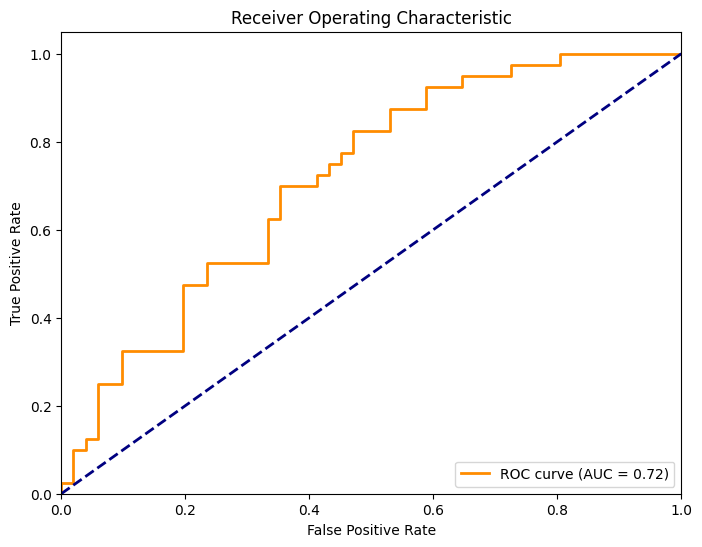

In [165]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test data
y_scores = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and the AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [166]:
# from sklearn.svm import SVC
#  # Define the model
# svc = SVC()

# # Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],              # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],  # Type of kernel
#     'gamma': ['scale', 'auto'],           # Kernel coefficient
#     'degree': [2, 3, 4]                   # Degree for poly kernel, if used
# }


In [167]:
# # Setup the GridSearchCV
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)


In [168]:
# # Best parameters found
# print("Best parameters found: ", grid_search.best_params_)

# # Best model
# best_svc = grid_search.best_estimator_

# # Predictions
# predictions = best_svc.predict(X_test)

# # Calculate the accuracy and classification report
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: {:.2f}%".format(accuracy * 100))
# print("Classification Report:\n", classification_report(y_test, predictions))


In [183]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Create the ExtraTreesClassifier instance
etc = ExtraTreesClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned model: {accuracy:.2f}")

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy of the tuned model: 0.74


In [184]:
# Predict probabilities for the test data
y_scores = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and the AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


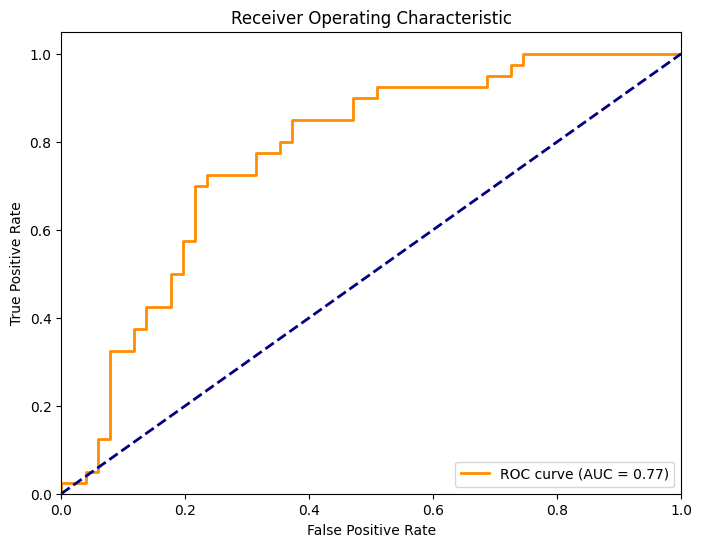

<Figure size 640x480 with 0 Axes>

In [185]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('AUC_curve.pdf')

In [172]:
from joblib import dump

# Save the model to a file
dump(best_model, 'extra_trees_best_model.joblib')

['extra_trees_best_model.joblib']

                              importance
Age                                 0.05
Olsenella_umbonata                  0.02
Clostridium_hathewayi               0.02
Alloprevotella_rava                 0.02
Sutterella_wadsworthensis           0.02
Parvimonas_micra                    0.02
Barnesiella_viscericola             0.02
Megasphaera_elsdenii                0.02
Parabacteroides_johnsonii           0.02
Bifidobacterium_ruminantium         0.02
Acetatifactor_muris                 0.02
Sporobacter_termitidis              0.02
Ruminococcus_lactaris               0.01
Bifidobacterium_bifidum             0.01
Parvibaculum_lavamentivorans        0.01
Methanosphaera_stadtmanae           0.01
Slackia_piriformis                  0.01
Fusobacterium_nucleatum             0.01
Butyricimonas_virosa                0.01
Bacteroides_vulgatus                0.01


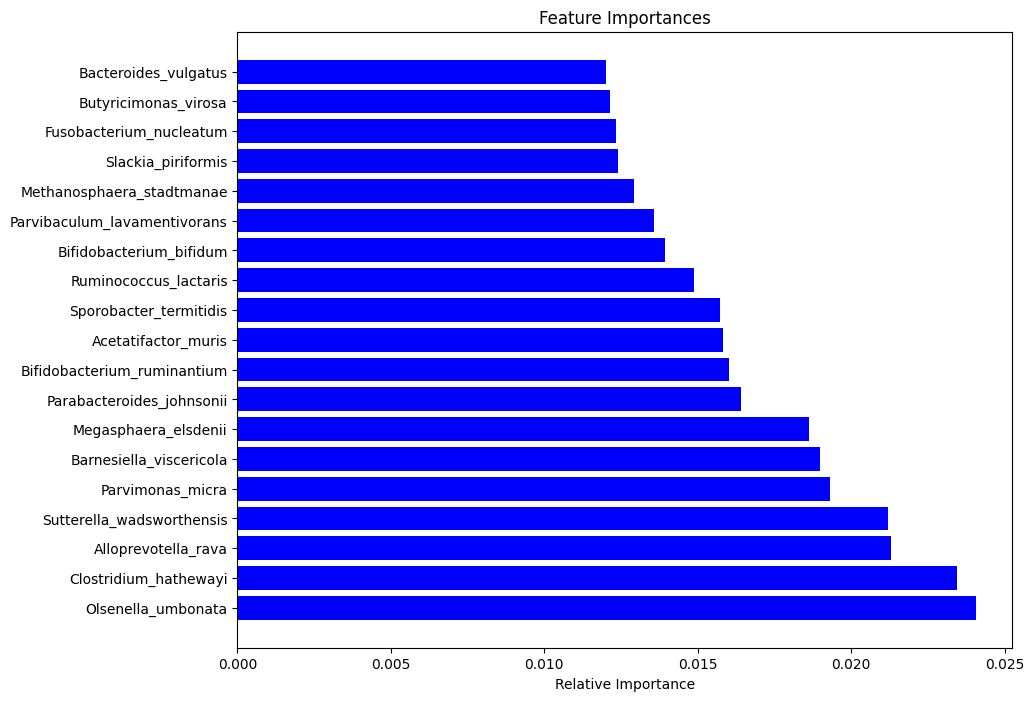

In [190]:
feature_importances = pd.DataFrame(best_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Show the top 10 features
print(feature_importances.head(20))

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.barh(feature_importances.index[1:20], feature_importances['importance'][1:20], color='b')
plt.xlabel('Relative Importance')
plt.show()


Top features for classifying CRC and non-CRC:
                             importance
Age                                0.05
Olsenella_umbonata                 0.02
Clostridium_hathewayi              0.02
Alloprevotella_rava                0.02
Sutterella_wadsworthensis          0.02
Parvimonas_micra                   0.02
Barnesiella_viscericola            0.02
Megasphaera_elsdenii               0.02
Parabacteroides_johnsonii          0.02
Bifidobacterium_ruminantium        0.02


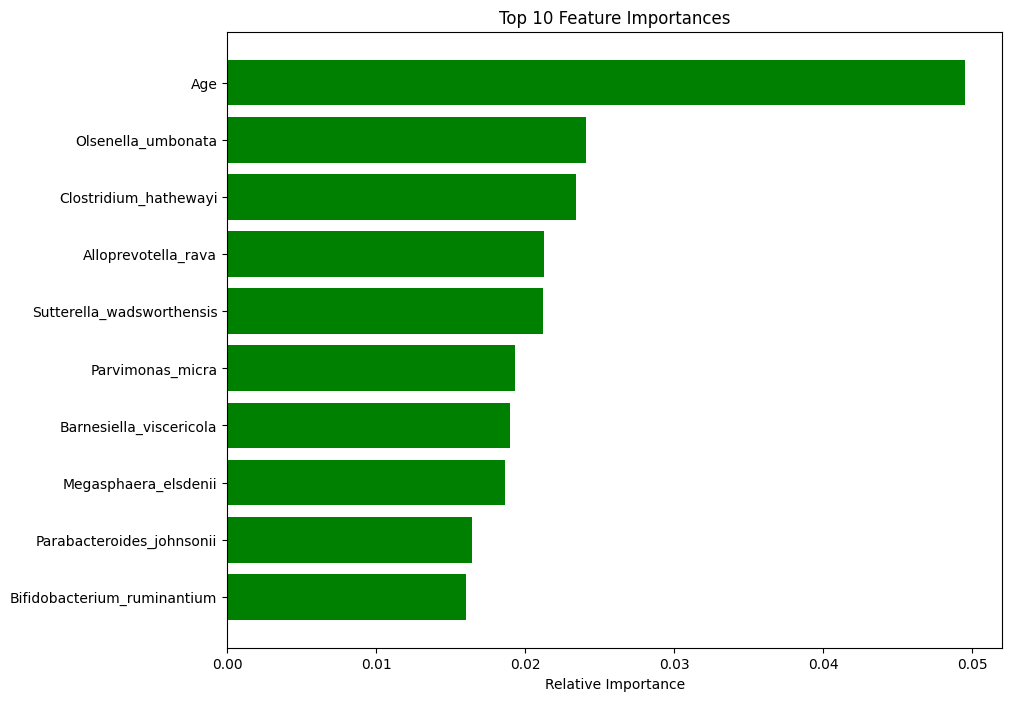

In [174]:
  # Extract feature importance
feature_importances = pd.DataFrame(best_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print the top features
print("Top features for classifying CRC and non-CRC:")
print(feature_importances.head(10))

# Optionally, plot feature importances
plt.figure(figsize=(10, 8))
plt.title("Top 10 Feature Importances")
plt.barh(feature_importances.index[:10], feature_importances['importance'][:10], color='green')
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()


In [175]:
# Extract feature importance
feature_importances = pd.DataFrame(best_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print the top features
print("Top features for classifying CRC and non-CRC:")
Top =feature_importances.head(20)
Top

Top features for classifying CRC and non-CRC:


,importance
Age,0.05
Olsenella_umbonata,0.02
Clostridium_hathewayi,0.02
Alloprevotella_rava,0.02
Sutterella_wadsworthensis,0.02
Parvimonas_micra,0.02
Barnesiella_viscericola,0.02
Megasphaera_elsdenii,0.02
Parabacteroides_johnsonii,0.02
Bifidobacterium_ruminantium,0.02


In [176]:
#Top.to_csv('Top_features.csv', index=False)

In [177]:
# # Assuming 'data' is your DataFrame with selected features
# data = pd.read_csv('/content/Top_features.csv')
# selected_features = data.columns[1:20]  # Adjust as necessary
# X = data[selected_features]

# # Calculate correlation matrix
# corr_matrix = X.corr()

# # Initialize a graph
# G = nx.Graph()

# # Add nodes
# for feature in selected_features:
#     G.add_node(feature)

# # Add edges based on correlation threshold
# threshold = 0.5  # Define your threshold here
# for i in range(len(corr_matrix.columns)):
#     for j in range(i + 1, len(corr_matrix.columns)):
#         if abs(corr_matrix.iloc[i, j]) > threshold:  # Absolute value for positive and negative correlations
#             G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=corr_matrix.iloc[i, j])

# # Draw the network
# plt.figure(figsize=(12, 12))
# pos = nx.spring_layout(G)  # Positions for all nodes
# edges = G.edges(data=True)
# weights = [abs(edata['weight'])*5 for _, _, edata in edges]  # Scale weights for visibility

# nx.draw_networkx_nodes(G, pos, node_size=700)
# nx.draw_networkx_edges(G, pos, width=weights)
# nx.draw_networkx_labels(G, pos, font_size=8)
# plt.title('Feature Correlation Network')
# plt.axis('off')  # Turn off the axis
# plt.show()

In [178]:
# from sklearn.svm import SVC

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Define parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],  # Type of the kernel used in the algorithm
#     'gamma': ['scale', 'auto'],  # Kernel coefficient
#     'degree': [2, 3, 4]  # Degree of the polynomial kernel function (if 'poly' is chosen)
# }

# # Create a SVC model
# svc = SVC()

# # Setup the GridSearchCV
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Run the grid search with the training data
# grid_search.fit(X_train, y_train)

# # Best parameters found
# print("Best parameters found:", grid_search.best_params_)

# # Get the best estimator
# best_svc = grid_search.best_estimator_

# # Predict on the test data using the best model
# y_pred = best_svc.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy of the best model:", accuracy)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [179]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create an AdaBoost instance with the decision tree as the base estimator
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define a parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)
# Best estimator found by GridSearchCV
best_clf = grid_search.best_estimator_

# Predict on the test data
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Test Set Accuracy: {accuracy:.2f}")


Best Model Parameters: {'base_estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100}
Test Set Accuracy: 0.63


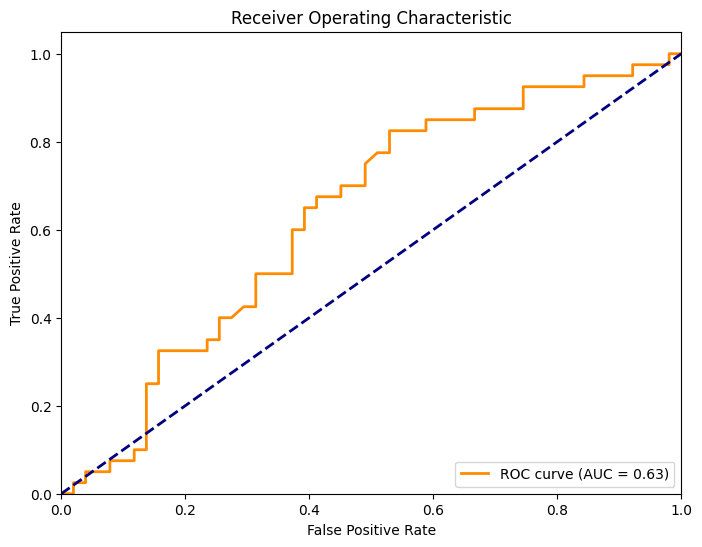

In [180]:
# Predict probabilities for the test data
y_scores = best_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and the AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [181]:
from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Define a parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)
# Best estimator found by GridSearchCV
best_clf = grid_search.best_estimator_

# Predict on the test data
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Test Set Accuracy: {accuracy:.2f}")



Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_dep

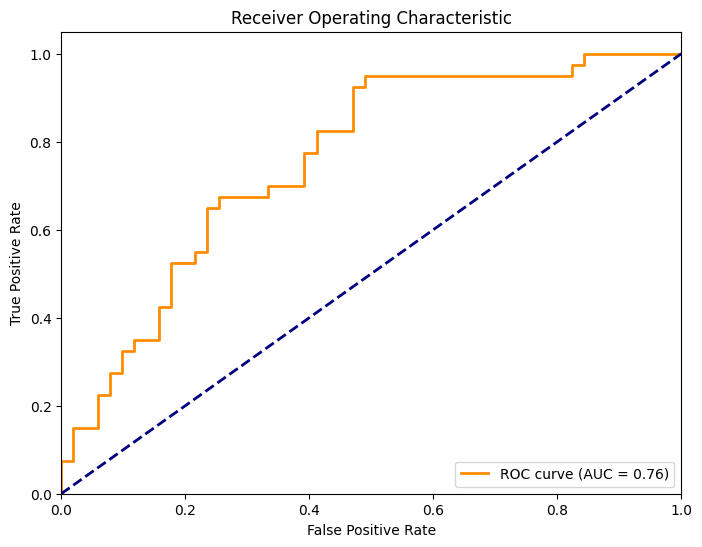

In [182]:
# Predict probabilities for the test data
y_scores = best_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and the AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()